___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../figures/capa2.png"/></a>
___
___

# Random Forest Project 

Para este projeto, exploraremos os dados disponíveis publicamente em [LendingClub.com](www.lendingclub.com). Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Esperançosamente, como investidor, você gostaria de investir em pessoas que mostrassem um perfil de alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O Lending Club teve um [ano muito interessante em 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), então vamos verificar alguns de seus dados e manter o contexto em mente. Esses dados são de antes mesmo de se tornarem públicos.

Usaremos dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagará ou não o empréstimo integralmente. Você pode baixar os dados [aqui](https://www.lendingclub.com/info/download-data.action) ou apenas usar o csv já fornecido. É recomendável usar o csv fornecido, pois ele foi limpo de valores NA.

Aqui está o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub.com e 0 caso contrário.
* purpose: A finalidade do empréstimo (toma os valores "credit_card", "debt_consolidation", "educacional", "major_purchase", "small_business" e "all_other").
* int.rate: A taxa de juros do empréstimo, como uma proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.
* installment: As parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O logaritmo natural da renda anual declarada pelo mutuário.
* dti: A relação dívida/renda do mutuário (montante da dívida dividido pela receita anual).
* fico: A pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias que o mutuário tem uma linha de crédito.
* revol.bal: Saldo rotativo do tomador (valor não pago ao final do ciclo de cobrança do cartão de crédito).
* revol.util: Taxa de utilização da linha rotativa do tomador (o valor da linha de crédito utilizada em relação ao crédito total disponível).
* inq.last.6mths: Número de consultas do mutuário pelos credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário atrasou um pagamento há mais de 30 dias nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (pedidos de falência, ônus fiscais ou sentenças).

# Importar a bibliotecas


**Importe as bibliotecas usuais para pandas e plotagem. Você pode importar o sklearn mais tarde.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter os dados

**Use pandas para ler `loan_data.csv` como um dataframe chamado lends.**

In [3]:
data_folder = '../data/'
loans = pd.read_csv(data_folder + 'loan_data.csv')

**Confira os métodos `info()`, `head()` e `describe()` sobre empréstimos.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análise exploratória de dados

Vamos fazer alguma visualização de dados! Usaremos os recursos de plotagem integrados seaborn e pandas, mas sinta-se à vontade para usar qualquer biblioteca que desejar. Não se preocupe com a correspondência de cores, apenas se preocupe em entender a ideia principal do enredo.

**Crie um histograma de duas distribuições FICO uma sobre a outra, uma para cada resultado da política de crédito.**

*Observação: isso é bastante complicado, sinta-se à vontade para consultar as soluções. Você provavelmente precisará de uma linha de código para cada histograma, também recomendo usar pandas integrados em `.hist()`*

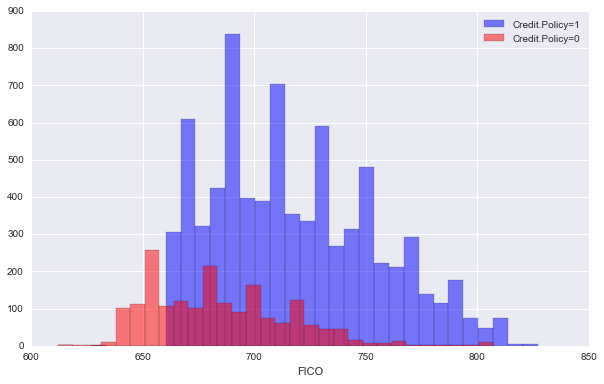

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

**Crie uma figura semelhante, exceto que desta vez selecione pela coluna `not.fully.paid`.**

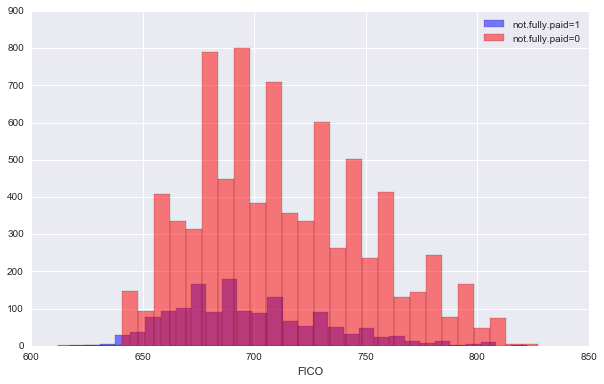

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

**Crie um gráfico de contagem usando seaborn mostrando as contagens de empréstimos por finalidade, com a tonalidade de cor definida por `not.fully.paid`. **

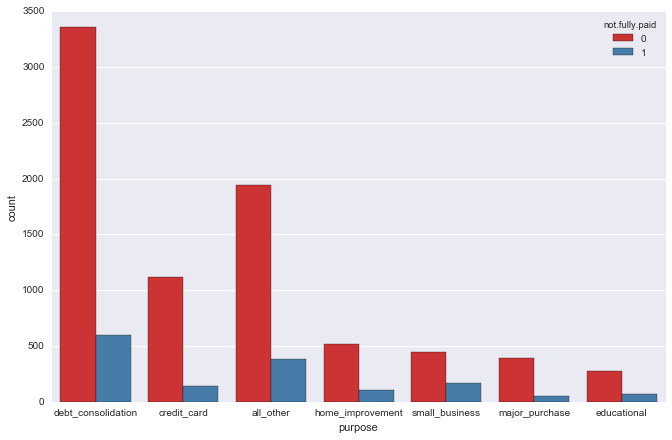

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Vamos ver a tendência entre a pontuação FICO e a taxa de juros. Recrie a seguinte plotagem `jointplot`.**

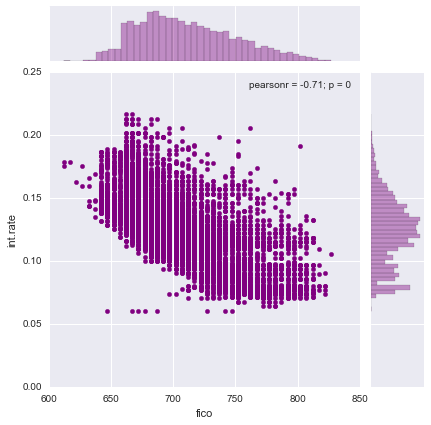

In [10]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

**Crie os seguintes `lmplots` para ver se a tendência difere entre `not.fully.paid` e `credit.policy`. Verifique a documentação de `lmplot()` se não conseguir descobrir como separá-lo em colunas.**

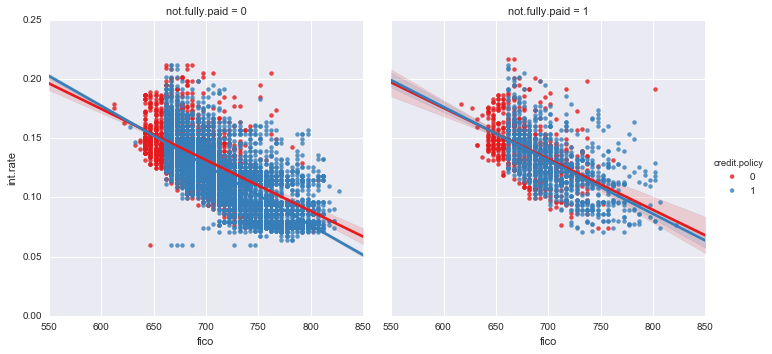

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Configurando os dados

Vamos nos preparar para configurar nossos dados para nosso Modelo de Classificação de Random Forest!

**Verifique `lends.info()` novamente.**

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Características categóricas

Observe que a coluna **purpose** como categórica

Isso significa que precisamos transformá-los usando variáveis fictícias para que o sklearn possa entendê-los. Vamos fazer isso em uma etapa limpa usando `pd.get_dummies`.

Vamos mostrar uma maneira de lidar com essas colunas que podem ser expandidas para vários features categóricos, se necessário.

**Crie uma lista de 1 elemento contendo a string `purpose`. Chame esta lista de `cat_feats`.**

In [13]:
cat_feats = ['purpose']

**Agora use `pd.get_dummies(loans,columns=cat_feats,drop_first=True)` para criar um dataframe fixo maior que tenha novas colunas de recursos com variáveis fictícias. Defina este dataframe como `final_data`.**

In [14]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

## Train Test Split

Agora é hora de dividir nossos dados em um conjunto de treinamento e um conjunto de teste!

** Use sklearn para dividir seus dados em um conjunto de treinamento e um conjunto de teste, como fizemos no passado.**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


## Treinando um Modelo de Árvore de Decisão

Vamos começar treinando uma única árvore de decisão primeiro!

**Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Crie uma instância de `DecisionTreeClassifier()` chamada `dtree` e ajuste-a aos dados de treinamento.**

In [19]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Previsões e Avaliação da Árvore de Decisão
**Crie previsões do conjunto de teste e crie um relatório de classificação e uma matriz de confusão.**

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.16      0.20      0.18       443

avg / total       0.74      0.72      0.73      2874



In [24]:
print(confusion_matrix(y_test,predictions))

[[1980  451]
 [ 355   88]]


## Treinando o modelo Random Forest

Agora é hora de treinar nosso modelo!

**Crie uma instância da classe `RandomForestClassifier` e ajuste-a aos nossos dados de treinamento da etapa anterior.**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=600)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Previsões e Avaliação

Vamos prever os valores de `y_test` e avaliar nosso modelo.

**Prever a classe de `not.fully.paid` para os dados `X_test`.**

In [28]:
predictions = rfc.predict(X_test)

**Agora crie um relatório de classificação a partir dos resultados. Você recebe algo estranho ou algum tipo de aviso?**

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Mostre a Matriz de Confusão para as previsões.**

In [31]:
print(confusion_matrix(y_test,predictions))

[[2427    4]
 [ 438    5]]


**O que teve melhor desempenho na floresta aleatória ou na árvore de decisão?**

In [36]:
# Depende de qual métrica você está tentando otimizar.
# Observe a recall de cada classe para os modelos.
# Nenhum dos dois se saiu muito bem, mais engenharia de features é necessária.

# Bom Trabalho!